In [12]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

## Preprocessing

In [2]:
# CSV import preprocessed (reduced, encoded, etc) data
## REPLACE WITH DATABASE IMPORT IN NEXT VERSION ##
health_df = pd.read_csv('../Resources/diabetes_binary_health_indicators_BRFSS2015.csv')

pd.set_option('display.max_columns', None)
health_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


array([[<AxesSubplot:title={'center':'MentHlth'}>]], dtype=object)

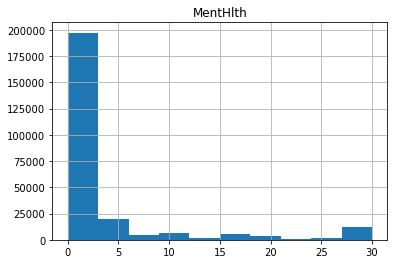

In [3]:
# Look at histogram of target (MentHlth) to decide bin ranges
health_df.hist(column='MentHlth')

In [4]:
# Create 2 bins for mental health. One at 0, one from 1-30
for index, row in health_df.iterrows():
    if health_df.loc[index,'MentHlth'] == 0:
        health_df.loc[index, 'MentHlth'] = 0
    elif health_df.loc[index,'MentHlth'] < 31:
        health_df.loc[index, 'MentHlth'] = 1
    else:
        health_df.loc[index, 'MentHlth'] = np.NaN

array([[<AxesSubplot:title={'center':'MentHlth'}>]], dtype=object)

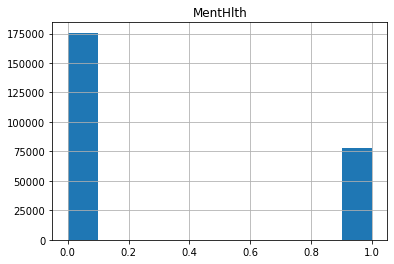

In [5]:
# Check target column bins
health_df.hist(column='MentHlth')

In [6]:
# Remove mental health target from features data
y = health_df.MentHlth
X = health_df.drop(columns=["MentHlth"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Model

In [8]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=0)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)

In [9]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score:.3f}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,37958,5962
Actual 1,12260,7240


Accuracy Score : 0.713
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81     43920
         1.0       0.55      0.37      0.44     19500

    accuracy                           0.71     63420
   macro avg       0.65      0.62      0.62     63420
weighted avg       0.69      0.71      0.69     63420



## Neural Network

In [10]:
len(X_train_scaled[0])

21

In [13]:
# Define the model - neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

Epoch 1/50
5946/5946 [==============================] - 4s 598us/step - loss: 0.5384 - accuracy: 0.7359
Epoch 2/50
5946/5946 [==============================] - 4s 666us/step - loss: 0.5380 - accuracy: 0.7360
Epoch 3/50
5946/5946 [==============================] - 6s 1ms/step - loss: 0.5378 - accuracy: 0.7363
Epoch 4/50
5946/5946 [==============================] - 8s 1ms/step - loss: 0.5375 - accuracy: 0.7361
Epoch 5/50
5946/5946 [==============================] - 5s 847us/step - loss: 0.5375 - accuracy: 0.7364
Epoch 6/50
5946/5946 [==============================] - 5s 784us/step - loss: 0.5374 - accuracy: 0.7368
Epoch 7/50
5946/5946 [==============================] - 4s 733us/step - loss: 0.5372 - accuracy: 0.7366
Epoch 8/50
5946/5946 [==============================] - 4s 724us/step - loss: 0.5371 - accuracy: 0.7370
Epoch 9/50
5946/5946 [==============================] - 4s 737us/step - loss: 0.5370 - accuracy: 0.7369
Epoch 10/50
5946/5946 [==============================] - 4s 744us/st

In [16]:
# Displaying results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5381284356117249, Accuracy: 0.7373541593551636
